In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score, explained_variance_score
import joblib
import json
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install --pre pycaret

In [ ]:
from pycaret.regression import *

In [2]:
df_original = pd.read_csv('/content/drive/MyDrive/# Hacktiv8 Data Science/Final Project/lamudi_final.csv')
df = df_original.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        2565 non-null   int64  
 1   Unnamed: 0          2565 non-null   int64  
 2   kota                2565 non-null   object 
 3   lokasi              2565 non-null   object 
 4   luas_lahan          2565 non-null   int64  
 5   luas_bangunan       2565 non-null   int64  
 6   kamar_tidur         2565 non-null   int64  
 7   kamar_mandi         2565 non-null   int64  
 8   keamanan_24jam      2565 non-null   object 
 9   taman_bermain_anak  2565 non-null   object 
 10  harga               2565 non-null   float64
 11  latitude            2565 non-null   float64
 12  longitude           2565 non-null   float64
 13  latitude_district   2565 non-null   float64
 14  longitude_district  2565 non-null   float64
 15  kecamatan           2565 non-null   object 
dtypes: flo

In [5]:
df['lokasi'].nunique()

807

In [3]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df.drop(['lokasi'], axis=1, inplace=True)
df.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [20]:
df['kecamatan'].unique()

array(['Cakung', 'Kebayoran Baru', 'Kebayoran Lama', 'Jagakarsa',
       'Duren Sawit', 'Ciracas', 'Kebon Jeruk', 'Kembangan',
       'Pulo Gadung', 'Cipayung', 'Cilandak', 'Makasar', 'Setia Budi',
       'Kali Deres', 'Pasar Rebo', 'Tebet', 'Pesanggrahan', 'Senen',
       'Jatinegara', 'Kramat Jati', 'Tanjung Priok', 'Pademangan',
       'Penjaringan', 'Mampang Prapatan', 'Grogol Petamburan', 'Pancoran',
       'Menteng', 'Pasar Minggu', 'Gunung Putri', 'Kemayoran',
       'Cilincing', 'Cempaka Putih', 'Cengkareng', 'Kelapa Gading',
       'Tanah Abang', 'Jatiasih', 'Gambir', 'Matraman', 'Koja', 'Tambora',
       'Palmerah', 'Pamulang', 'Taman Sari', 'Johar Baru', 'Sawah Besar',
       'Tapos', 'Cinere', 'Jatisampurna'], dtype=object)

# FEATURE ENGINEERING

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   kota                2565 non-null   object 
 1   luas_lahan          2565 non-null   int64  
 2   luas_bangunan       2565 non-null   int64  
 3   kamar_tidur         2565 non-null   int64  
 4   kamar_mandi         2565 non-null   int64  
 5   keamanan_24jam      2565 non-null   object 
 6   taman_bermain_anak  2565 non-null   object 
 7   harga               2565 non-null   float64
 8   latitude            2565 non-null   float64
 9   longitude           2565 non-null   float64
 10  latitude_district   2565 non-null   float64
 11  longitude_district  2565 non-null   float64
 12  kecamatan           2565 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 260.6+ KB


In [4]:
X = df.drop(['harga'], axis=1)
Y = df['harga']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33)

In [6]:
input_transformer = ColumnTransformer(
  transformers=[
    ("robust scaler", RobustScaler(), ['luas_lahan', 'luas_bangunan']),
    ("Onehot Encoder", OneHotEncoder(handle_unknown='ignore'), ['kota', 'keamanan_24jam', 'taman_bermain_anak', 'kecamatan']),
    ('Drop location column', 'drop', ['kecamatan'])
  ],
  remainder = 'passthrough'
)

In [15]:
X_train.shape

(2052, 13)

In [16]:
X_test.shape

(513, 13)

## Checking Feature Importance

In [7]:
train = pd.concat([X_train, Y_train], axis=1)

s = setup(train, target = 'harga')

,Description,Value
0,Session id,7715
1,Target,harga
2,Target type,Regression
3,Original data shape,"(2052, 11)"
4,Transformed data shape,"(2052, 15)"
5,Transformed train set shape,"(1436, 15)"
6,Transformed test set shape,"(616, 15)"
7,Ordinal features,2
8,Numeric features,6
9,Categorical features,4


In [8]:
rf_model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2648183158.4962,56826501167225921536.0000,7538335437.4309,0.6752,0.3962,0.3455
1,4408843848.3324,423932852336771465216.0000,20589629728.0153,0.3315,0.5147,0.4615
2,2574829508.9895,70722709831153639424.0000,8409679532.0127,0.4402,0.4402,0.4031
3,3107567216.1801,142554750092616957952.0000,11939629395.1118,-0.2735,0.5328,0.5256
4,3407263445.4349,85855900900513251328.0000,9265845935.5049,0.7627,0.4442,0.4666
5,3357022444.1734,126654527834127646720.0000,11254089382.7145,0.6798,0.5042,0.4342
6,2462481263.6785,40345092597821882368.0000,6351778695.5956,0.5651,0.4317,0.3944
7,2172151501.2478,24437622254690684928.0000,4943442348.6767,0.8616,0.4742,0.4587
8,2851723063.3552,91760677714871042048.0000,9579179386.2977,0.4652,0.5200,0.5058


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
evaluate_model(rf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# MODELLING

## Model & Hyperparameter Selection with PyCaret

In [7]:
train = pd.concat([X_train, Y_train], axis=1)

In [8]:
s = setup(train, target = 'harga')

,Description,Value
0,Session id,469
1,Target,harga
2,Target type,Regression
3,Original data shape,"(2052, 11)"
4,Transformed data shape,"(2052, 15)"
5,Transformed train set shape,"(1436, 15)"
6,Transformed test set shape,"(616, 15)"
7,Ordinal features,2
8,Numeric features,6
9,Categorical features,4


In [9]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,4131085826.9737,104676913460536492032.0000,9323399003.8916,0.6264,1.1487,1.5326,0.1160
ridge,Ridge Regression,4166439130.9228,104943567287006806016.0000,9339288306.8532,0.6249,1.1460,1.5944,0.1130
lr,Linear Regression,4167434724.9967,104948811798079815680.0000,9339560690.8917,0.6248,1.1454,1.5956,0.6990
lasso,Lasso Regression,4167434769.5580,104948811922902614016.0000,9339560699.8193,0.6248,1.1454,1.5956,0.1280
lar,Least Angle Regression,4167434769.4846,104948811932534292480.0000,9339560700.1813,0.6248,1.1454,1.5956,0.1180
llar,Lasso Least Angle Regression,4167434768.5634,104948811925209825280.0000,9339560699.7812,0.6248,1.1454,1.5956,0.2090
knn,K Neighbors Regressor,3061589824.0000,104145154683538145280.0000,9308207308.8000,0.6184,0.5856,0.5815,0.1200
rf,Random Forest Regressor,2946565959.6807,103418482310770180096.0000,9304826106.3012,0.6038,0.4780,0.4493,0.7520
lightgbm,Light Gradient Boosting Machine,3057398716.6437,106066558364761063424.0000,9435552922.0170,0.5842,0.5057,0.4763,0.7180
gbr,Gradient Boosting Regressor,3245031489.2014,127331831752752496640.0000,10251757989.5601,0.5174,0.5478,0.5768,0.2420


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [18]:
print(best_model)

ElasticNet(random_state=469)


In [27]:
rf_model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3078884174.6398,89483669456869621760.0000,9459580828.8142,0.6543,0.4930,0.4541
1,3783675614.3924,101984688524490522624.0000,10098746878.9197,0.3925,0.5081,0.5057
2,2272339987.0848,57112024264407310336.0000,7557249781.7928,0.6099,0.4316,0.3396
3,2574459132.0359,53937906534609084416.0000,7344243087.9301,0.3816,0.5292,0.5231
4,1574585378.9888,14763265398139060224.0000,3842299493.5506,0.8772,0.4216,0.3528
5,3023454799.3419,116505168512782663680.0000,10793755996.5372,0.6833,0.4254,0.3984
6,4472399799.9193,395379145768983461888.0000,19884143073.5394,0.3896,0.4519,0.4044
7,2738947377.5826,45338307949797548032.0000,6733372702.4276,0.8091,0.5158,0.5155
8,2642554299.3418,42195705526566117376.0000,6495822159.4011,0.6544,0.5100,0.5447


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
tuned_model = tune_model(rf_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3274551845.6437,89849664417716043776.0000,9478906288.0543,0.6529,0.5958,0.6593
1,3130011501.9475,41344869432120901632.0000,6429997623.0261,0.7537,0.5527,0.6036
2,2282272665.9797,45161560388420378624.0000,6720235143.8339,0.6916,0.4831,0.4618
3,2562595749.2957,39997348356844396544.0000,6324345686.0646,0.5415,0.6233,0.7863
4,1701006873.1251,11040136439476097024.0000,3322670076.8322,0.9081,0.5080,0.5271
5,3141697720.2178,142163194492474114048.0000,11923220810.3546,0.6136,0.5096,0.5279
6,4808920516.8243,398137103918110998528.0000,19953373246.5995,0.3853,0.5756,0.6162
7,3305279620.9240,55613064466202132480.0000,7457416742.1569,0.7658,0.6527,0.8017
8,2580515259.5716,32817308698175950848.0000,5728639340.9060,0.7312,0.6202,0.7667


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [29]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(tuned_model)

### Visualizing Regression Line on Low Level Feature

In [11]:
# create PCA object
pca = PCA(n_components=1, random_state=33)
rb_scaler = RobustScaler()
# fit PCA to the data
X_train_pca = X_train.copy()
X_train_pca.drop('kecamatan', axis=1, inplace=True)
X_train_pca[['luas_lahan','luas_bangunan']] = rb_scaler.fit_transform(X_train_pca[['luas_lahan','luas_bangunan']])
X_train_pca = pd.get_dummies(X_train_pca, columns=['kota', 'keamanan_24jam', 'taman_bermain_anak'])
pca.fit(X_train_pca)

# create a new dataframe with principal components as columns
df_1d_pca = pd.DataFrame(pca.transform(X_train_pca), columns=['PCA 1'])

In [12]:
# df_1d_pca = df_1d_pca.reset_index(drop=True)
# Y_train = Y_train.reset_index(drop=True)
df_1d_pca = df_1d_pca.values
Y_train = Y_train.values
df_1d_pca = df_1d_pca[:, 0]

# pca_train = pd.concat([df_1d_pca, Y_train], columns =['PCA', 'harga'],axis=1, ignore_index=True)
train_pca = pd.DataFrame({'pca': df_1d_pca, 'price': Y_train})

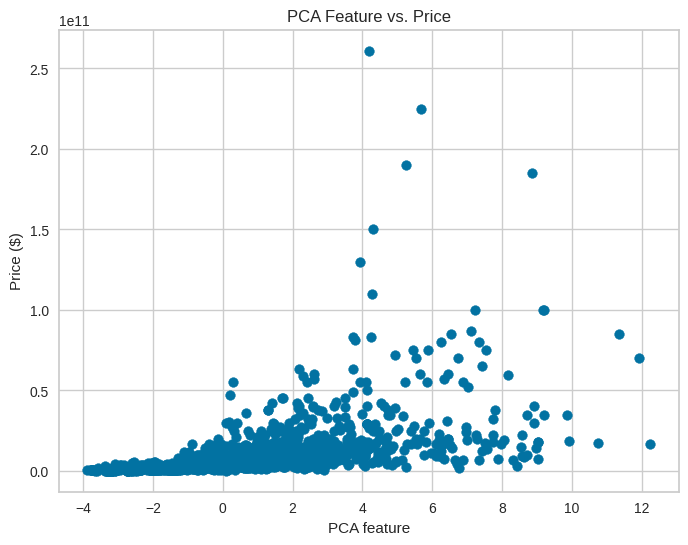

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(train_pca['pca'], train_pca['price'], marker='o', color='b')
plt.title('PCA Feature vs. Price')
plt.xlabel('PCA feature')
plt.ylabel('Price ($)')
plt.grid(True)

# Show the plot
plt.show()

In [24]:
X = train_pca['pca'].values.reshape(-1, 1)
y = train_pca['price'].values.reshape(-1, 1)

model_visualizer = RandomForestRegressor()
model_visualizer.fit(X, y)

RandomForestRegressor()

In [25]:
X_range = np.linspace(X.min(), X.max(), 2052).reshape(-1, 1)
y_pred = model_visualizer.predict(X_range)

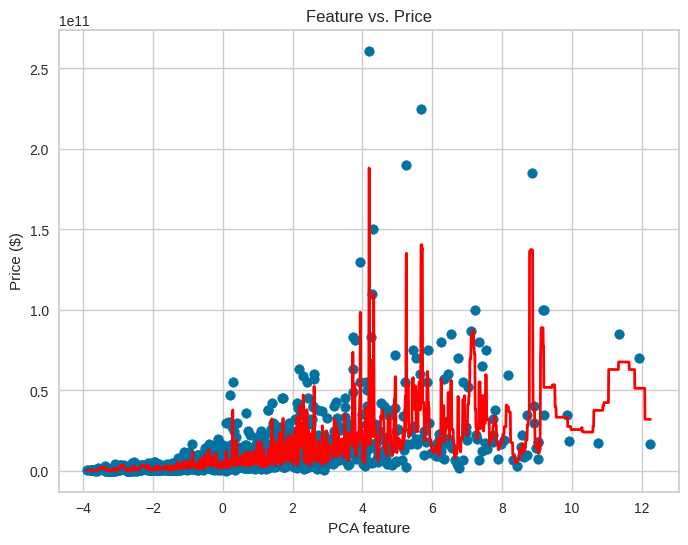

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(train_pca['pca'], train_pca['price'], marker='o', color='b')

plt.plot(X_range, y_pred, label='Random Forest Regressor', color='red', linewidth=2)

plt.title('Feature vs. Price')
plt.xlabel('PCA feature')
plt.ylabel('Price ($)')
plt.grid(True)

# Show the plot
plt.show()

In [21]:
X = train_pca['pca'].values.reshape(-1, 1)
y = train_pca['price'].values.reshape(-1, 1)
model_visualizer = ElasticNet(alpha=7.63,
                                    copy_X =True,
                                    fit_intercept = False,
                                    l1_ratio=0.532,
                                    max_iter=1000,
                                    positive=False,
                                    precompute=False,
                                    random_state = 469,
                                    selection = 'cyclic',
                                    tol=0.0001,
                                    warm_start = False)

model_visualizer.fit(X, y)

ElasticNet(alpha=7.63, fit_intercept=False, l1_ratio=0.532, random_state=469)

In [22]:
X_range = np.linspace(X.min(), X.max(), 2052).reshape(-1, 1)
y_pred = model_visualizer.predict(X_range)

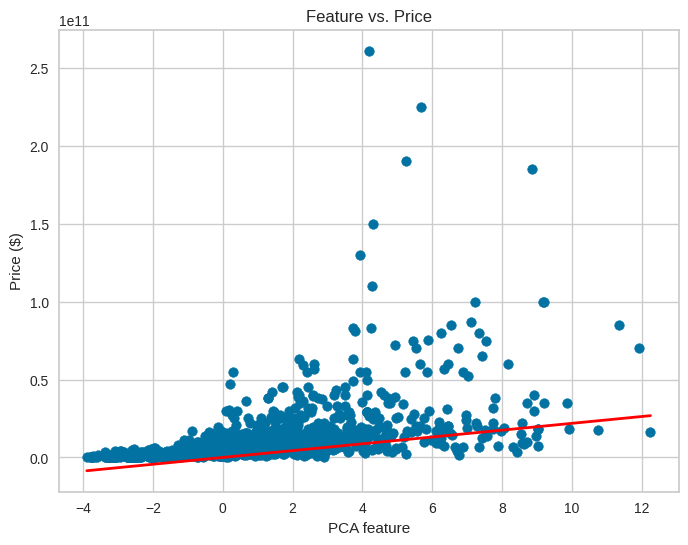

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(train_pca['pca'], train_pca['price'], marker='o', color='b')

plt.plot(X_range, y_pred, label='Elastic Net Regression', color='red', linewidth=2)

plt.title('Feature vs. Price')
plt.xlabel('PCA feature')
plt.ylabel('Price ($)')
plt.grid(True)

# Show the plot
plt.show()

## Defining the Best Model

In [7]:
model = Pipeline(
  steps=[
    ("input processing", input_transformer),
    ("Regression Model", RandomForestRegressor(bootstrap=True,
                                               ccp_alpha = 0.0,
                                               criterion = 'squared_error',
                                               max_depth =11,
                                               max_features = 'log2',
                                               max_leaf_nodes = None,
                                               max_samples =None,
                                               min_impurity_decrease = 0.0002,
                                               min_samples_leaf = 5,
                                               min_samples_split =10,
                                               min_weight_fraction_leaf	=0.0,
                                               n_estimators =180,
                                               n_jobs =-1,
                                               oob_score = False,
                                               random_state = 469,
                                               verbose = 0,
                                               warm_start = False))
  ]
)

# MODEL EVALUATION & RESULT INTERPRETATION

## Evaluation Metric

***Mean Absolute Error (MAE)***
measures the average absolute difference between the predicted and actual values.
Interpretation: A lower MAE indicates that, on average, the models predictions are close to the actual prices.
Example: If MAE is $1000, it means on average the models predictions are off by $1000 from the actual prices.

***Mean Squared Error (MSE)*** measures the average squared difference between the predicted and actual values.
Interpretation: MSE penalizes larger errors more than smaller ones. A lower MSE indicates smaller errors.
Example: If your MSE is 100, it means, on average, the squared errors are 100 square units away from the actual prices.

***The Root Mean Squared Error (RMSE)*** is the square root of the MSE and provides the error in the same units as the target variable.
Interpretation: It's easier to interpret compared to MSE. A lower RMSE indicates better performance.
Example: If your RMSE is 10, it means your predictions are typically off by 10 units (e.g., $10).

***R-squared (R2)*** measures the proportion of variance in the dependent variable that is predictable from the independent variables.
Interpretation: An R2 score of 0.8, for example, means that 80% of the variance in house prices can be explained by the features in your model.
Example: An R2 of 1.0 means that your model perfectly predicts house prices, while an R2 of 0 means your model doesn't explain any variance.

***The Mean Absolute Percentage Error (MAPE)*** measures the percentage difference between predicted and actual values.
Interpretation : MAPE of 5% means on average, models prediction are off by 5% from actual prices.
Example : if the model predict the price of a house is $100.000, ant the MAPE is 5%, it means the actual prices is likely between $95.000 and $105.000


***The Explained Variance Score*** measures the proportion of variance in the dependent variable that is explained by the model.
Interpretation: An explained variance of 0.9, for example, means that 90% of the variance in house prices is explained by your model.
Example: An explained variance of 1.0 indicates a perfect fit.

In [8]:
model.fit(X_train, Y_train)

Pipeline(steps=[('input processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust scaler',
                                                  RobustScaler(),
                                                  ['luas_lahan',
                                                   'luas_bangunan']),
                                                 ('Onehot Encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['kota', 'keamanan_24jam',
                                                   'taman_bermain_anak',
                                                   'kecamatan']),
                                                 ('Drop location column',
                                                  'drop', ['kecamatan'])])),
                ('Regression Model',
                 RandomForestRegressor(max_depth=11, max_features='log2',
                                       min_impurity_decrease=0.0002,
                                       min_samples_leaf=5, min_samples_split=10,
                                       n_estimators=180, n_jobs=-1,
                                       random_state=469))])

In [9]:
# Sample actual and predicted values
y_pred = model.predict(X_train)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_train, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_train, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(Y_train, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((Y_train - y_pred) / Y_train)) * 100

# Calculate Explained Variance Score
explained_variance = explained_variance_score(Y_train, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Explained Variance Score: {explained_variance:.2f}")

Mean Absolute Error (MAE): 3290976548.72
Mean Squared Error (MSE): 93601352919364681728.00
Root Mean Squared Error (RMSE): 9674779218.12
R-squared (R2): 0.61
Mean Absolute Percentage Error (MAPE): 121.97%
Explained Variance Score: 0.61


MAE result is 3.676.175.599 which shows that the average of model's prediction is off 3.676.175.599 rupiah.

MSE result is 114366260990929600512 shows that on average the squared error of the prediction is 114366260990929600512 off from the actual price. MSE is bigger because it penalize the larger error.

RMSE result is 10.694.216.240.14 shows that the models prediction is typically off around. 10 billion.

R2 result is 0.53 shows that 53% of the variance in house prices can be explained by the features the model use. The feature and the model used is around 53% correct at predicting property prices

MAPE result is 77.03% shows that by average the model prediction is off around 77% from the actual price.

Explained Variance Score result is 0.53 means that 53 percent of varince in property prices is explained by the model. 0.53 means that the model is not quiet a good fit.

In [10]:
# Sample actual and predicted values
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(Y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100

# Calculate Explained Variance Score
explained_variance = explained_variance_score(Y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Explained Variance Score: {explained_variance:.2f}")

Mean Absolute Error (MAE): 3361961825.70
Root Mean Squared Error (RMSE): 9235654732.39
R-squared (R2): 0.62
Mean Absolute Percentage Error (MAPE): 128.82%
Explained Variance Score: 0.62


MAE result is 3494680836 which shows that the average of model's prediction is off 3.49 billion rupiah.

MSE result is 89669446321955930112 shows that on average the squared error of the prediction is  off from the actual price. MSE is bigger because it penalize the larger error.

RMSE result is 9469395245 shows that the models prediction is typically off around. 9 billion.

R2 result is 0.6 shows that 60% of the variance in house prices can be explained by the features the model use. The feature and the model used is around 53% correct at predicting property prices

MAPE result is 76.21% shows that by average the model prediction is off around 76.21% from the actual price.

Explained Variance Score result is 0.60 means that 60 percent of varince in property prices is explained by the model. 0.60 means that the model is not quiet a good fit.

## Checking Model Performance for Different price range

https://www.kompas.com/properti/read/2023/05/06/170000221/berdasarkan-harganya-ini-beda-rumah-mewah-menengah-dan-sederhana?page=all

In [11]:
simple_house = df[df['harga'] < 450000000]
medium_house = df[(df['harga'] >= 451000000) & (df['harga'] <= 2257000000)]
luxury_house = df[df['harga'] > 2258000000]

In [12]:
X = simple_house.drop(['harga'], axis=1)
Y = simple_house['harga']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33)

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
explained_variance = explained_variance_score(Y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Explained Variance Score: {explained_variance:.2f}")

Mean Absolute Error (MAE): 77938534.56
Root Mean Squared Error (RMSE): 93988258.81
R-squared (R2): 0.19
Mean Absolute Percentage Error (MAPE): 40.74%
Explained Variance Score: 0.19


In [13]:
X = medium_house.drop(['harga'], axis=1)
Y = medium_house['harga']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33)

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
explained_variance = explained_variance_score(Y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Explained Variance Score: {explained_variance:.2f}")

Mean Absolute Error (MAE): 302728629.87
Root Mean Squared Error (RMSE): 365623354.46
R-squared (R2): 0.49
Mean Absolute Percentage Error (MAPE): 28.63%
Explained Variance Score: 0.49


In [14]:
X = luxury_house.drop(['harga'], axis=1)
Y = luxury_house['harga']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33)

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
explained_variance = explained_variance_score(Y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Explained Variance Score: {explained_variance:.2f}")

Mean Absolute Error (MAE): 5250784309.24
Root Mean Squared Error (RMSE): 11060371083.61
R-squared (R2): 0.63
Mean Absolute Percentage Error (MAPE): 58.01%
Explained Variance Score: 0.63


In [15]:
columns = ['Low Prices Houses', 'Medium Priced Houses', 'Luxury Houses']
data = {
    'All House Price Range': ['3.36 billion', '9.23 billion', '0.62', '128.82%', '0.62'],
    'Low Prices Houses': ['77.93 million', '93.98 million', '0.19', '40.74%', '0.19'],
    'Medium Priced Houses': ['302.72 million', '365.62 million', '0.49', '28.63%', '0.49'],
    'Luxury Houses': ['5.25 Billion', '11.06 billion', '0.63', '58.01%', '0.63']
}

# Define row names
row_names = ['MAE', 'RMSE', 'R2', 'MAPE', 'Explained Variance Score']
performance_comparison = pd.DataFrame(data, index=row_names)

In [16]:
performance_comparison

,All House Price Range,Low Prices Houses,Medium Priced Houses,Luxury Houses
MAE,3.36 billion,77.93 million,302.72 million,5.25 Billion
RMSE,9.23 billion,93.98 million,365.62 million,11.06 billion
R2,0.62,0.19,0.49,0.63
MAPE,128.82%,40.74%,28.63%,58.01%
Explained Variance Score,0.62,0.19,0.49,0.63


# MODEL SAVING

In [18]:
# saving the model, and column transformer
with open('model.pkl', 'wb') as file_1:
  joblib.dump(model, file_1)

with open('model_transformer.pkl', 'wb') as file_2:
  joblib.dump(input_transformer, file_2)

# MODEL INFERENCE

In [13]:
# loading model
with open('model.pkl', 'rb') as file_1:
  model = joblib.load(file_1)

with open('model_transformer.pkl', 'rb') as file_2:
  transformer = joblib.load(file_2)

In [14]:
test_dict = df.iloc[2292:2293].to_dict('records')
test_dict

[{'kota': 'Jakarta Selatan',
  'luas_lahan': 90,
  'luas_bangunan': 72,
  'kamar_tidur': 3,
  'kamar_mandi': 2,
  'keamanan_24jam': 'Ada',
  'taman_bermain_anak': 'Ada',
  'harga': 1300000000.0,
  'latitude': -6.28381815,
  'longitude': 106.80486325728526}]

In [15]:
df_original['kota'].unique()

array(['Jakarta Timur', 'Jakarta Selatan', 'Jakarta Barat',
       'Jakarta Pusat', 'Jakarta Utara'], dtype=object)

In [ ]:
# making dummmy data for inference
test_data = pd.DataFrame({
  'kota': ['Jakarta Selatan'],
  'luas_lahan': [90],
  'luas_bangunan': [72],
  'kamar_tidur': [3],
  'kamar_mandi': [2],
  'keamanan_24jam': ['Ada'],
  'taman_bermain_anak': ['Ada'],
  'harga': [1300000000.0],
  'latitude': [-6.28381815],
  'longitude': [106.80486325728526]
  }
)

In [ ]:
model.predict(test_data)

# CONCLUSION AND RECOMMENDATION

model kurang viable

pemisahan data berdasar kategori

data tidak 100% tepat

tahun properti berpengaruh, mungkin ada data tercampur